In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import datasets 
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
boston_dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_dataset['MEDV'] = boston.target
boston_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


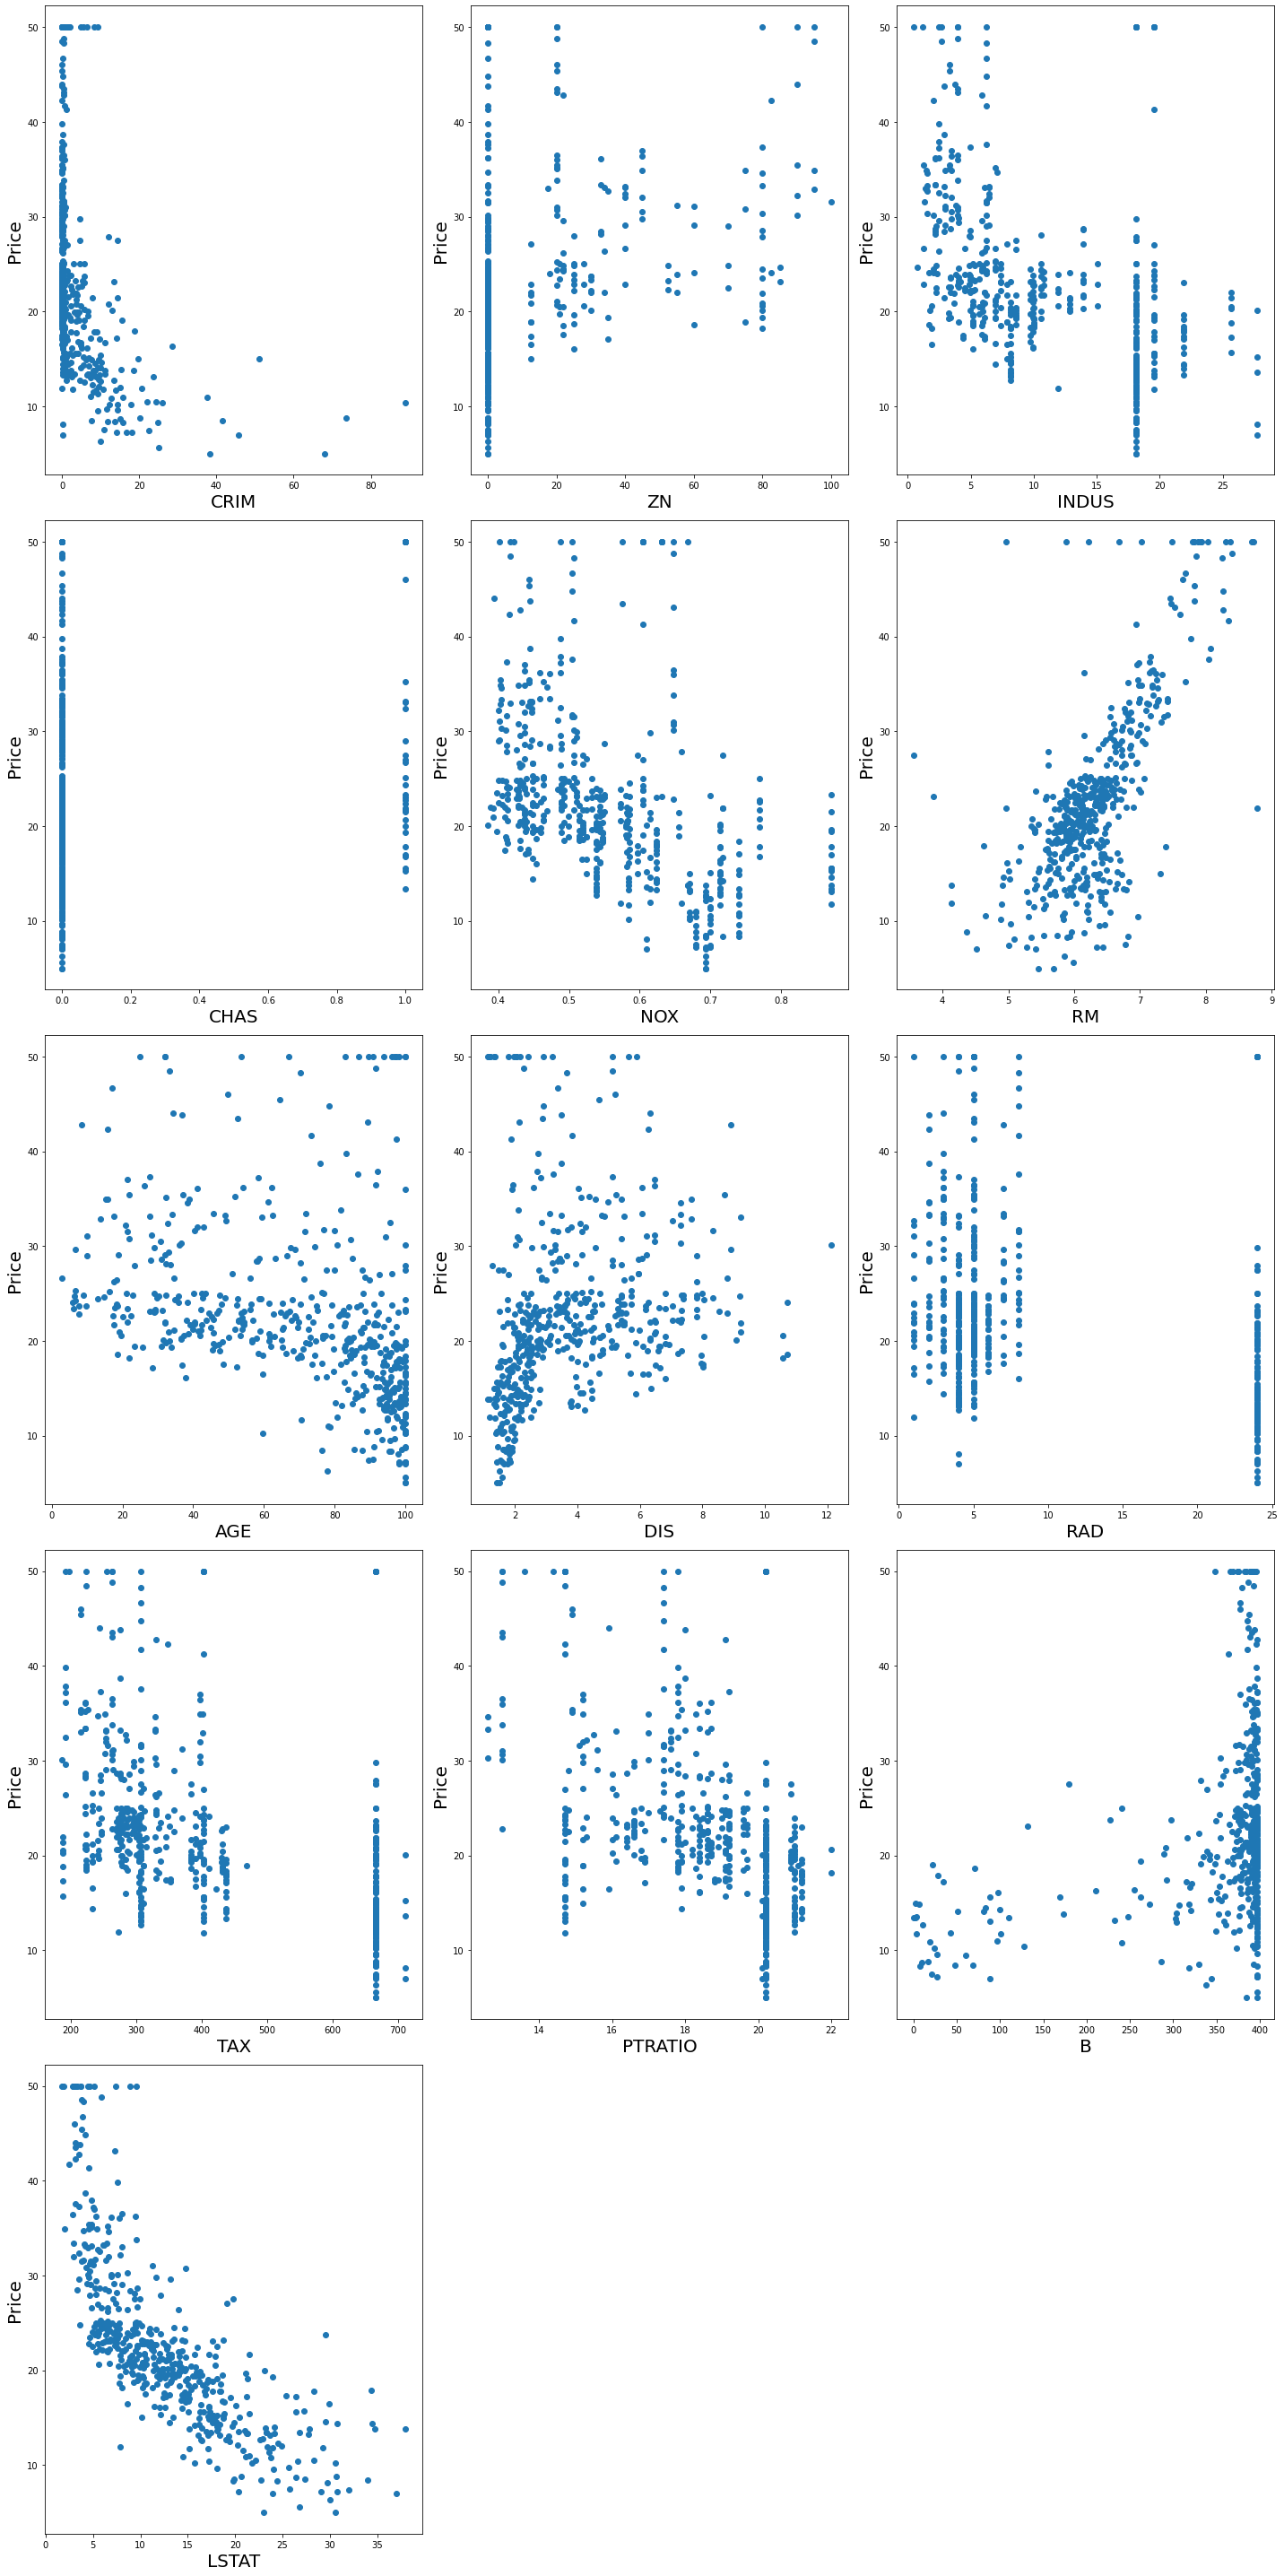

In [4]:
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target
import seaborn as sns
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for column in features:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(features[column],targets)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [5]:
boston_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


No missing value, so now let's standardized the data 

In [6]:
from sklearn import preprocessing
x = preprocessing.normalize(features, norm='l2')
y = preprocessing.normalize([targets], norm='l2')

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x
vif = pd.DataFrame()
vif["Features"] = features.columns
vif["VIF normalized"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

,Features,VIF normalized
0,CRIM,2.052440
1,ZN,2.864073
2,INDUS,9.791515
3,CHAS,1.140465
4,NOX,69.729257
5,RM,84.286064
6,AGE,17.191777
7,DIS,14.764702
8,RAD,11.077397
9,TAX,45.826334


In [8]:
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()
X_scaled = scaler.fit_transform(features)

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif["VIF standardized"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

,Features,VIF normalized,VIF standardized
0,CRIM,2.052440,1.792192
1,ZN,2.864073,2.298758
2,INDUS,9.791515,3.991596
3,CHAS,1.140465,1.073995
4,NOX,69.729257,4.393720
5,RM,84.286064,1.933744
6,AGE,17.191777,3.100826
7,DIS,14.764702,3.955945
8,RAD,11.077397,7.484496
9,TAX,45.826334,9.008554


We find that standardization giving better vif result.

In [10]:
X = boston_dataset.iloc[:, :-1].values
y = boston_dataset.iloc[:, -1].values
X_scaled = scaler.fit_transform(X)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=0)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [12]:
regressor.score(x_train,y_train)

0.9742565198186764

In [13]:
regressor.score(x_test,y_test)

0.7613328151972893

In [14]:
test = pd.DataFrame()
test['y test'] = y_test
test['y predicted Random forest'] = regressor.predict(x_test)
test

,y test,y predicted Random forest
0,22.6,23.64
1,50.0,24.63
2,23.0,20.66
3,8.3,9.49
4,21.2,20.82
...,...,...
122,19.4,21.12
123,21.2,22.34
124,20.3,21.15
125,18.8,18.33


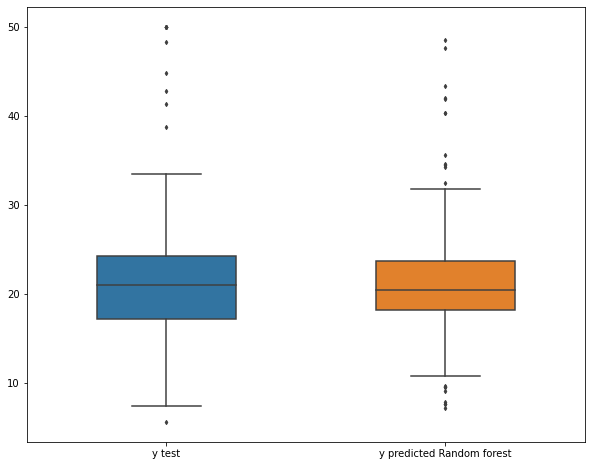

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=test, width= 0.5,ax=ax,  fliersize=3)

The random forest is having a score of 0.76 and now let's find out the score for a single decision tree model.

In [16]:
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor(random_state = 1)
dtregressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [17]:
dtregressor.score(x_train,y_train)

1.0

In [25]:
dtregressor.score(x_test,y_test)

0.6264577812542786

In [18]:
test['y predicted decision tree'] = dtregressor.predict(x_test)
test

,y test,y predicted Random forest,y predicted decision tree
0,22.6,23.64,22.9
1,50.0,24.63,25.0
2,23.0,20.66,23.3
3,8.3,9.49,16.3
4,21.2,20.82,20.8
...,...,...,...
122,19.4,21.12,14.4
123,21.2,22.34,21.4
124,20.3,21.15,25.0
125,18.8,18.33,20.5
